In [ ]:
#Name: Vatsal Borad
#Roll No.: 15
#Panel: G
#ERP Id.: 1032201077

In [55]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#read the data
#Plant 1 = Arunachal Pradesh
#Plant 2 = Maharashtra

df = pd.read_csv('Plant_1_Generation_Data.csv')
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [56]:

#importing the data for weather conditions
df2 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
df2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [57]:
#convertinf Date_Time to datetime format in df2
df2['DATE_TIME'] = pd.to_datetime(df2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
#making a new column for date
df2['DATE'] = df2['DATE_TIME'].dt.date
#making a new column for time
df2['TIME'] = df2['DATE_TIME'].dt.time
df2.head()
#dropping the DATE_TIME column
df2.drop(['DATE_TIME'], axis=1, inplace=True)

In [58]:
#selecting morning to evening data only
df2 = df2[(df2['TIME'] >= dt.time(6,0,0)) & (df2['TIME'] <= dt.time(18,0,0))]
df2.head()

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
24,4135001,HmiyD2TTLFNqkNe,24.088446,22.206757,0.005887,2020-05-15,06:00:00
25,4135001,HmiyD2TTLFNqkNe,24.011635,22.353459,0.022282,2020-05-15,06:15:00
26,4135001,HmiyD2TTLFNqkNe,23.976731,22.893282,0.049410,2020-05-15,06:30:00
27,4135001,HmiyD2TTLFNqkNe,24.218990,24.442444,0.095394,2020-05-15,06:45:00
28,4135001,HmiyD2TTLFNqkNe,24.537398,27.185653,0.141940,2020-05-15,07:00:00


In [59]:
#print the first 5 rows
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [60]:
#count the number of rows and columns
df.shape

(68778, 7)

In [61]:
df.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [62]:
df2.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,1635.0,1635.000000,1635.000000,1635.000000
mean,4135001.0,27.591495,40.086636,0.443807
std,0.0,3.229068,11.094496,0.283902
min,4135001.0,20.426455,18.254061,0.001575
25%,4135001.0,25.215445,30.809261,0.193774
50%,4135001.0,27.677307,40.778583,0.437669
75%,4135001.0,29.910869,48.500976,0.661368
max,4135001.0,35.252486,65.545714,1.221652


In [63]:
df2.shape

(1635, 7)

In [64]:
#making sum of rows with same date
df = df.groupby('DATE_TIME').sum()
df
#discarding night time data
df = df[df['DC_POWER'] != 0]
df

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
01-06-2020 06:00,90970022,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,1710.142857,164.980357,8.696429,1.535195e+08
01-06-2020 06:15,90970022,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,9903.910714,957.937500,135.178571,1.535196e+08
01-06-2020 06:30,90970022,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,21118.410714,2051.105357,507.553571,1.535200e+08
01-06-2020 06:45,90970022,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,34080.821429,3330.226786,1170.607143,1.535207e+08
01-06-2020 07:00,90970022,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,46438.571428,4552.700000,2158.464286,1.535216e+08
...,...,...,...,...,...,...
31-05-2020 17:30,90970022,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,30843.964286,3010.575000,129805.410714,1.535181e+08
31-05-2020 17:45,90970022,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,22993.250000,2234.587500,130445.071429,1.535187e+08
31-05-2020 18:00,90970022,1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...,14723.732143,1426.600000,130917.250001,1.535192e+08


In [65]:
#removing time from date time
df.drop(['SOURCE_KEY'],axis=1,inplace=True)
df.drop(['AC_POWER'],axis=1,inplace=True)
df.drop(['DC_POWER'],axis=1,inplace=True)
df.drop(['TOTAL_YIELD'],axis=1,inplace=True)
df.drop(['PLANT_ID'],axis=1,inplace=True)
df.head()

,DAILY_YIELD
DATE_TIME,
01-06-2020 06:00,8.696429
01-06-2020 06:15,135.178571
01-06-2020 06:30,507.553571
01-06-2020 06:45,1170.607143
01-06-2020 07:00,2158.464286


In [66]:
df.tail()

,DAILY_YIELD
DATE_TIME,
31-05-2020 17:30,129805.410714
31-05-2020 17:45,130445.071429
31-05-2020 18:00,130917.250001
31-05-2020 18:15,131158.035715
31-05-2020 18:30,131228.107143


In [67]:
#removing 0 values rows
df = df[df['DAILY_YIELD'] != 0]
df.head()

,DAILY_YIELD
DATE_TIME,
01-06-2020 06:00,8.696429
01-06-2020 06:15,135.178571
01-06-2020 06:30,507.553571
01-06-2020 06:45,1170.607143
01-06-2020 07:00,2158.464286


In [68]:
#checking for null values
df.isnull().sum()

DAILY_YIELD    0
dtype: int64

In [69]:
df.describe()

,DAILY_YIELD
count,1686.000000
mean,79085.115999
std,58801.456294
min,0.125000
25%,20005.000000
50%,78915.107143
75%,129072.629465
max,193764.071429


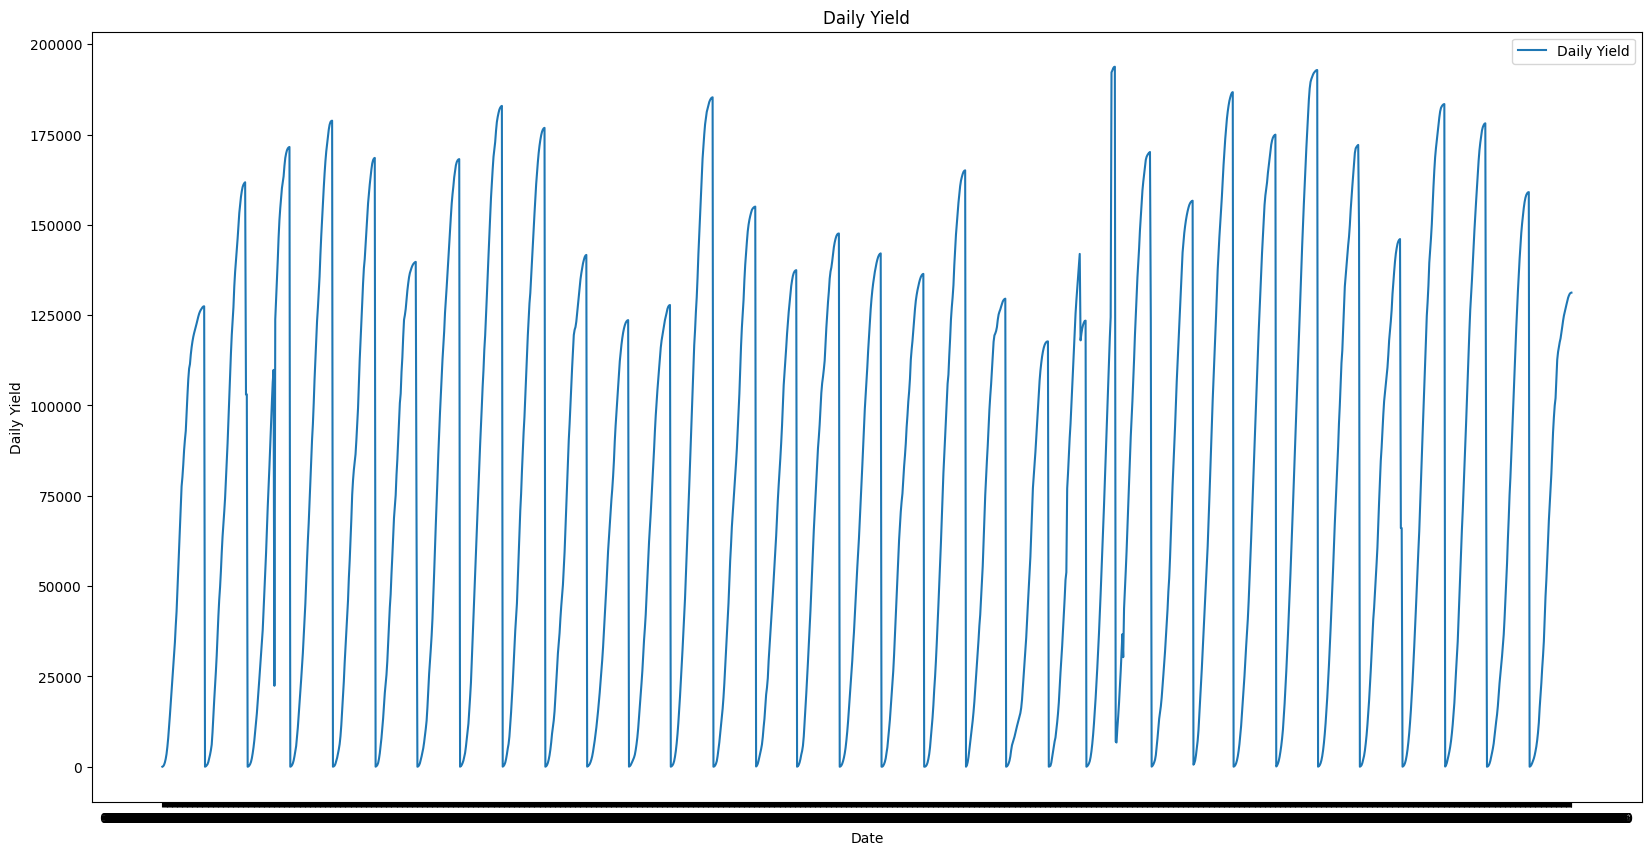

In [70]:
#plotting the data
plt.figure(figsize=(20,10))
sns.lineplot(data=df['DAILY_YIELD'],label='Daily Yield')
plt.title('Daily Yield')
plt.xlabel('Date')
plt.ylabel('Daily Yield')
plt.show()

#store daily yield in a variable
daily_yield = df['DAILY_YIELD']

In [71]:
df.shape

(1686, 1)

In [72]:
#removing outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df.shape


(1686, 1)

In [73]:
#Ambient Temperature : Means the temperature of the surrounding air.
#Module Temperature : Means the temperature of the solar panel.
#Irradiation : Means the solar irradiation incident on the plant surface.

#role of Irradiation in power generation is to convert the solar energy into electrical energy.
#Irradiation is the amount of solar power that is incident on a surface area.
#removing Source key column
df2.drop(['SOURCE_KEY'],axis=1,inplace=True)
df2.drop(['PLANT_ID'],axis=1,inplace=True)
df2.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
24,24.088446,22.206757,0.005887,2020-05-15,06:00:00
25,24.011635,22.353459,0.022282,2020-05-15,06:15:00
26,23.976731,22.893282,0.049410,2020-05-15,06:30:00
27,24.218990,24.442444,0.095394,2020-05-15,06:45:00
28,24.537398,27.185653,0.141940,2020-05-15,07:00:00


In [74]:
df2.shape

(1635, 5)

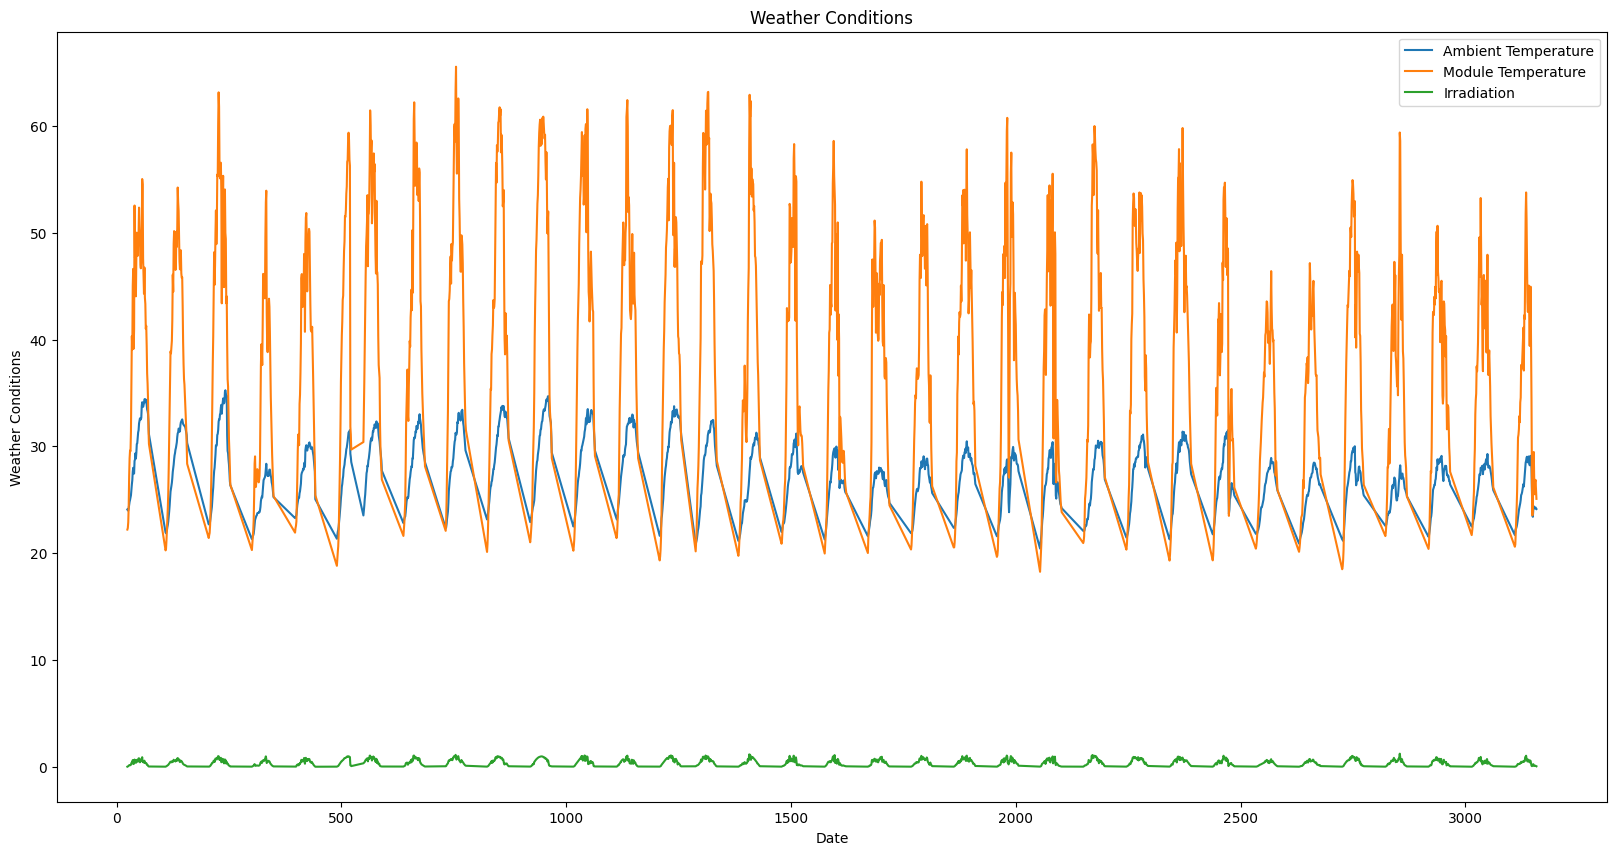

In [75]:
#making relation between weather conditions
plt.figure(figsize=(20,10))
sns.lineplot(data=df2['AMBIENT_TEMPERATURE'],label='Ambient Temperature')
sns.lineplot(data=df2['MODULE_TEMPERATURE'],label='Module Temperature')
sns.lineplot(data=df2['IRRADIATION'],label='Irradiation')
plt.title('Weather Conditions')
plt.xlabel('Date')
plt.ylabel('Weather Conditions')
plt.show()


In [76]:
#using ANN for prediction
#splitting the data
from sklearn.model_selection import train_test_split
#selecting 1635 row in df2 and daily_yield
#removing date and time column
#scaling the data between 0 and 1

df2 = df2.iloc[:1635,:]
daily_yield = daily_yield.iloc[:1635]
df2.drop(['DATE'],axis=1,inplace=True)
df2.drop(['TIME'],axis=1,inplace=True)
daily_yield = daily_yield.values.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
daily_yield = sc.fit_transform(daily_yield)
df2 = sc.fit_transform(df2)
df2 = pd.DataFrame(df2)

X_train, X_test, y_train, y_test = train_test_split(df2, daily_yield, test_size=0.2, random_state=0)


#scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#importing keras
import keras
from keras.models import Sequential
from keras.layers import Dense

#initializing the ANN
classifier = Sequential()

#adding the input layer and first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=3))

#adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

#adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

#compiling the ANN
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

#predicting the test set results
y_pred = classifier.predict(X_test)

#print the predicted values
y_pred

Epoch 1/100
131/131 [==============================] - 1s 1ms/step - loss: 0.0995 - accuracy: 0.0015
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.0015
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.0015
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 0.0015
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.0023
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.0023
Epoch 7/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.0023
Epoch 8/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.0023
Epoch 9/100
131/131 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.0023
Epoch 10/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0808 - accura

array([[0.56461   ],
       [0.46819678],
       [0.6105094 ],
       [0.29612592],
       [0.18720382],
       [0.4107093 ],
       [0.31275824],
       [0.5162368 ],
       [0.3836555 ],
       [0.32768887],
       [0.3824519 ],
       [0.37756842],
       [0.251065  ],
       [0.5092297 ],
       [0.48774222],
       [0.3821897 ],
       [0.5341772 ],
       [0.26267403],
       [0.6382104 ],
       [0.6401657 ],
       [0.27633342],
       [0.31749615],
       [0.5124122 ],
       [0.30324185],
       [0.44828615],
       [0.3614286 ],
       [0.41355667],
       [0.37967467],
       [0.26060233],
       [0.50392073],
       [0.46809188],
       [0.39396572],
       [0.38549387],
       [0.53042024],
       [0.28504938],
       [0.45906705],
       [0.47740823],
       [0.3138385 ],
       [0.29039913],
       [0.6668873 ],
       [0.3433176 ],
       [0.21285564],
       [0.39169705],
       [0.43748823],
       [0.5581182 ],
       [0.44771692],
       [0.6475868 ],
       [0.387

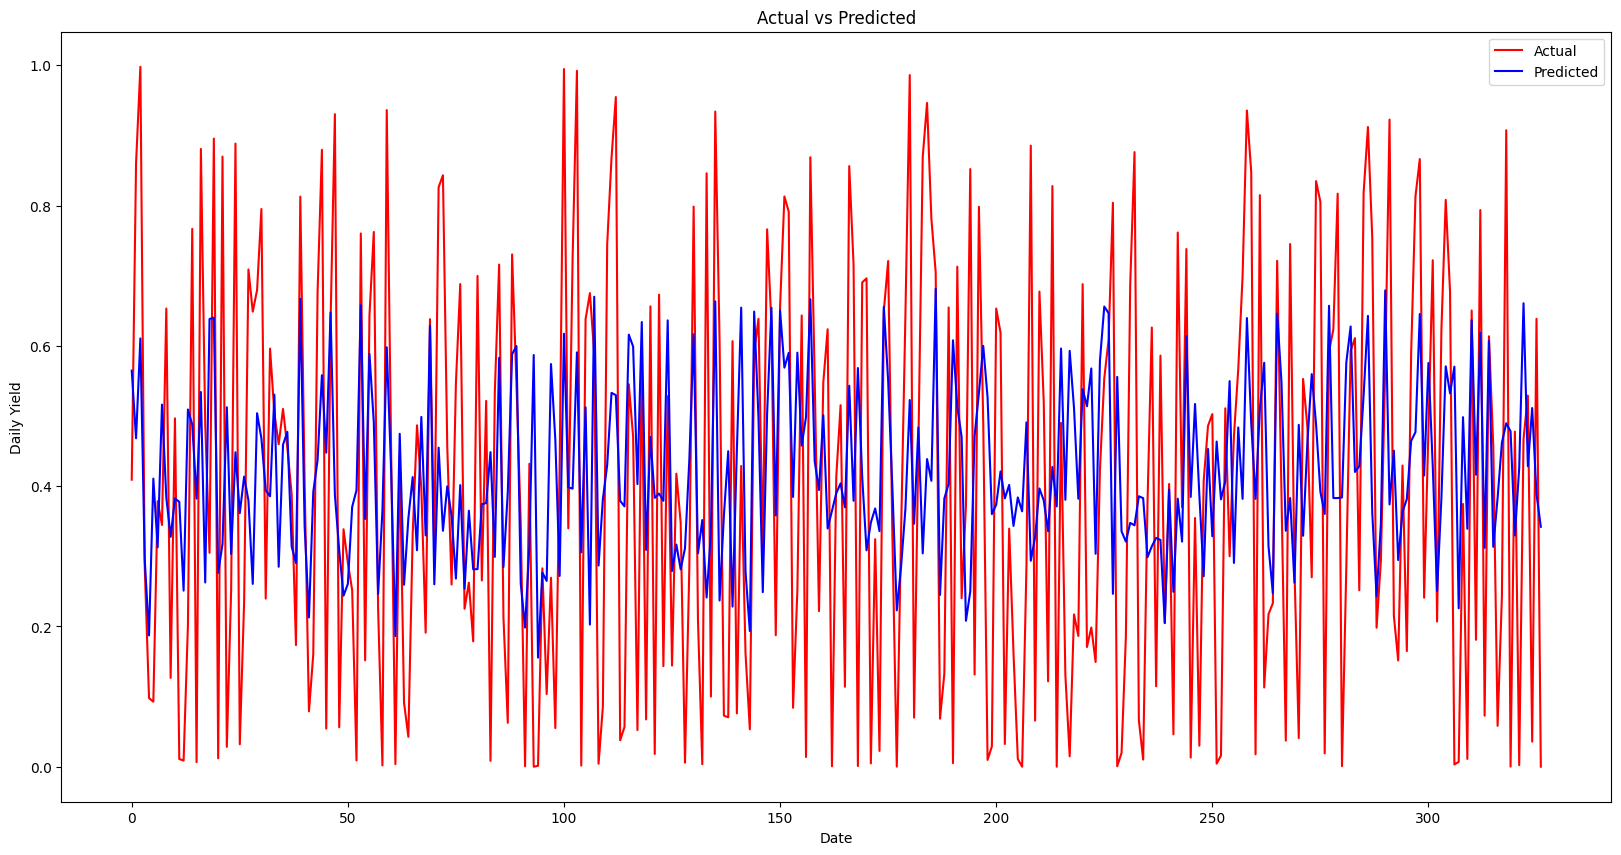

In [77]:
#plotting actual and predicted values in different colors
plt.figure(figsize=(20,10))
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_pred, color='blue', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Daily Yield')
plt.legend()
plt.show()


In [78]:
#calculating the mean squared error
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

#print accuracy based on mean squared error
print("Accuracy:",100-mean_squared_error(y_test, y_pred))

#calculating the root mean squared error
from sklearn.metrics import mean_squared_error  
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",rms)

#normalized root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print("Noramlized RMSE:", rms/np.mean(y_test))

#calculating the mean absolute percentage error
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:" ,mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.07669723873114737
Accuracy: 99.92330276126886
RMSE: 0.2769426632556771
Noramlized RMSE: 0.6795232529392004
Mean Absolute Error: 0.23570016701042593


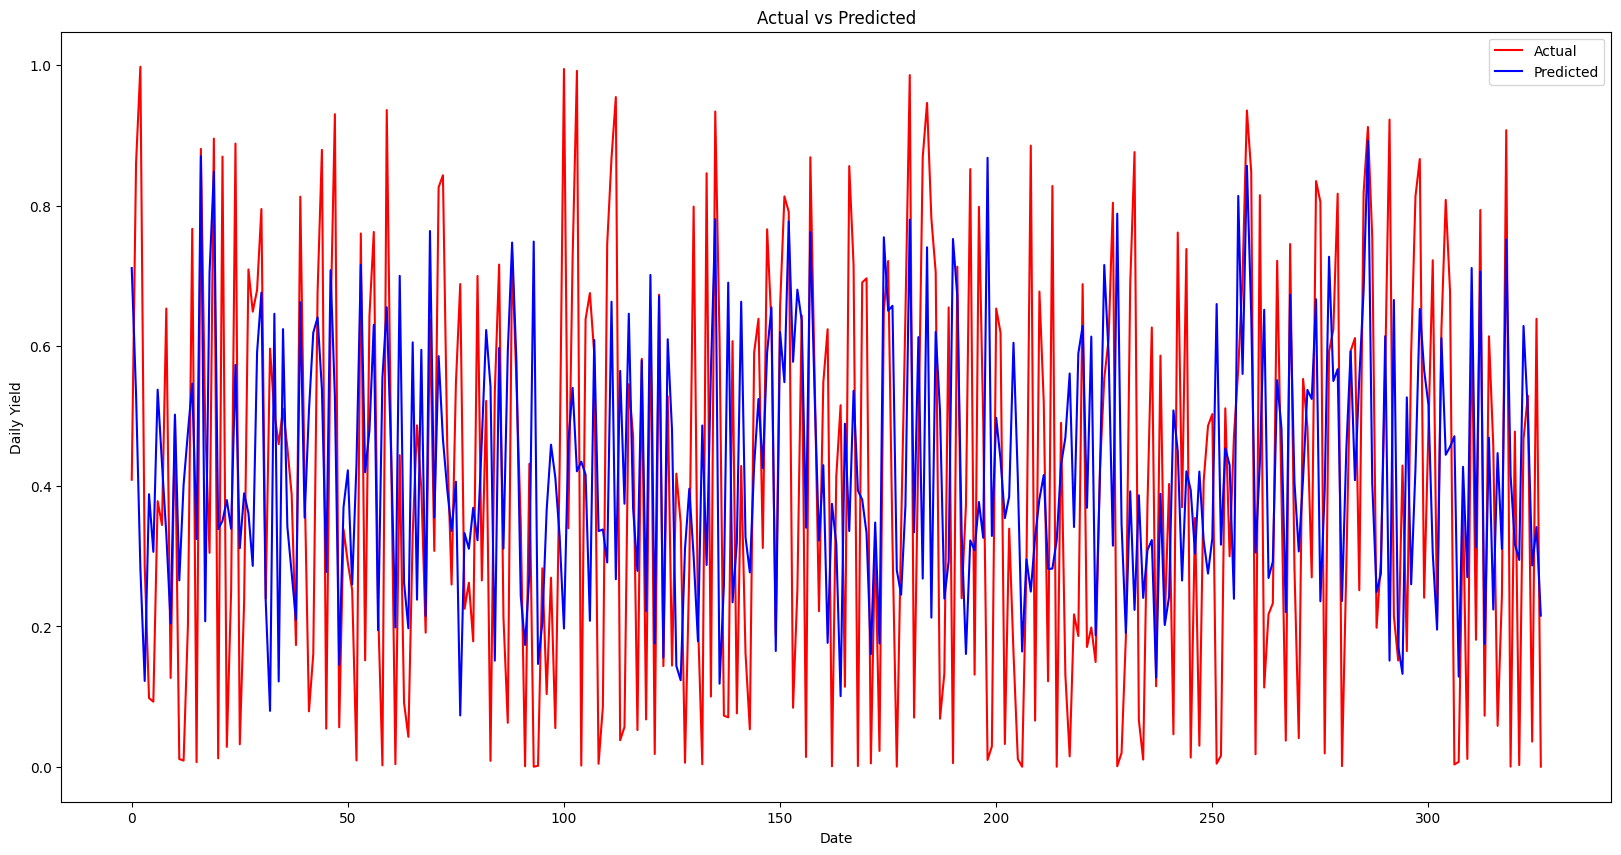

In [79]:
#using ensemble learning
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

#predicting the test set results
y_pred = regressor.predict(X_test)

#print the predicted values
y_pred

#plotting actual and predicted values in different colors
plt.figure(figsize=(20,10))
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_pred, color='blue', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Daily Yield')
plt.legend()
plt.show()

In [80]:
#print accuracy and mean squared error
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Accuracy:",100-mean_squared_error(y_test, y_pred))
#calculating the root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",rms)


Mean Squared Error: 0.08723578867945671
Accuracy: 99.91276421132055
RMSE: 0.2953570528689923


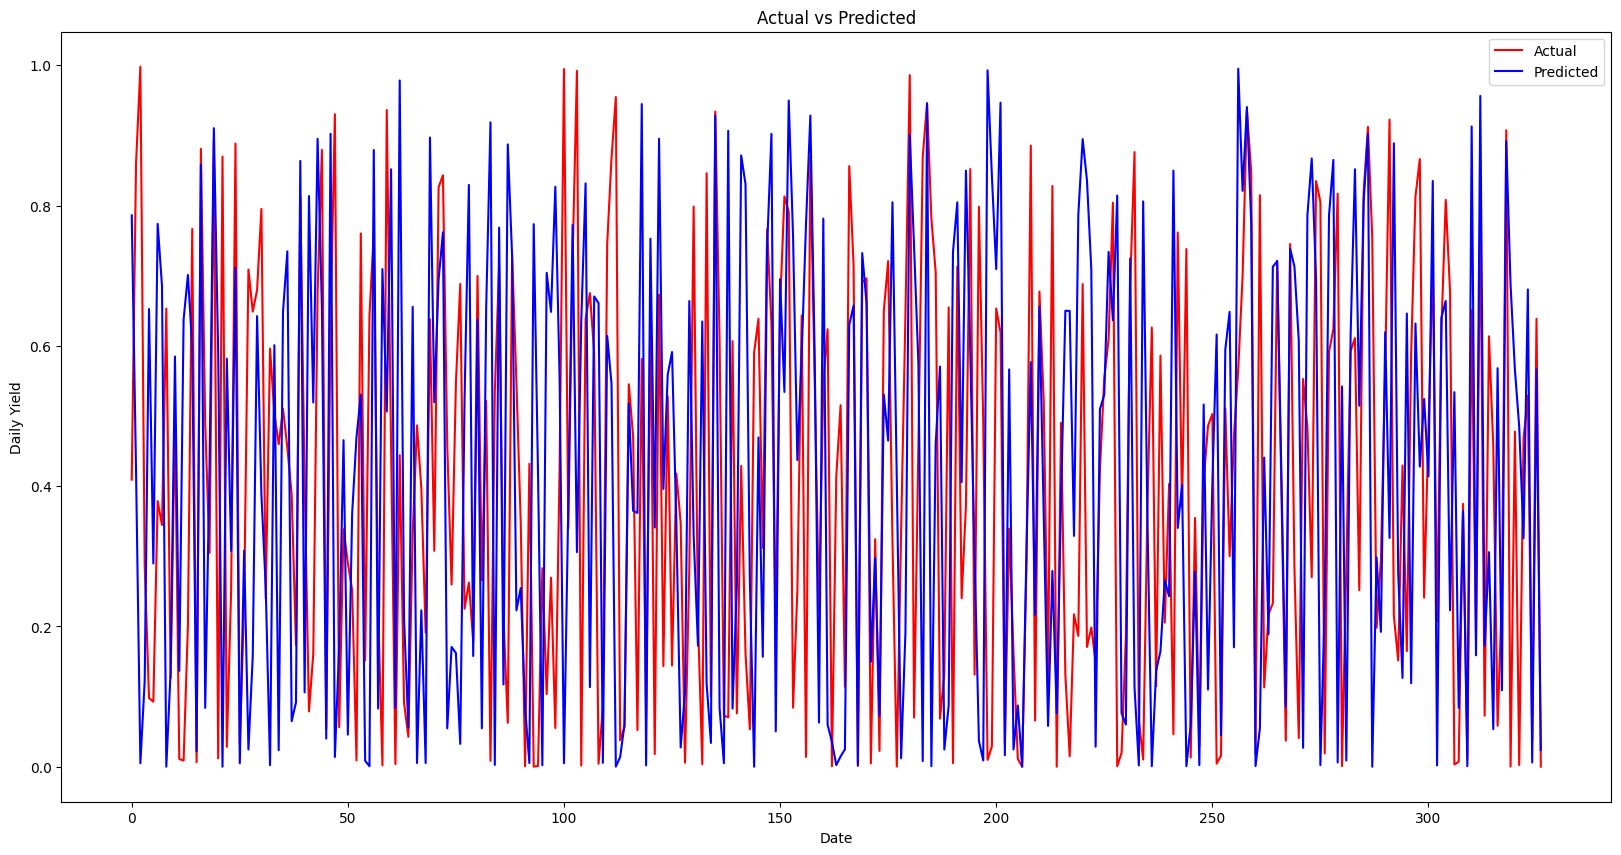

In [81]:
#using decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

#predicting the test set results
y_pred = regressor.predict(X_test)

#print the predicted values
y_pred

#plotting actual and predicted values in different colors
plt.figure(figsize=(20,10))
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_pred, color='blue', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Daily Yield')
plt.legend()
plt.show()


In [82]:
#print accuracy and mean squared error
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Accuracy:",100-mean_squared_error(y_test, y_pred))

#calculating the root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",rms)


Mean Squared Error: 0.14843941089952306
Accuracy: 99.85156058910047
RMSE: 0.38527835508827


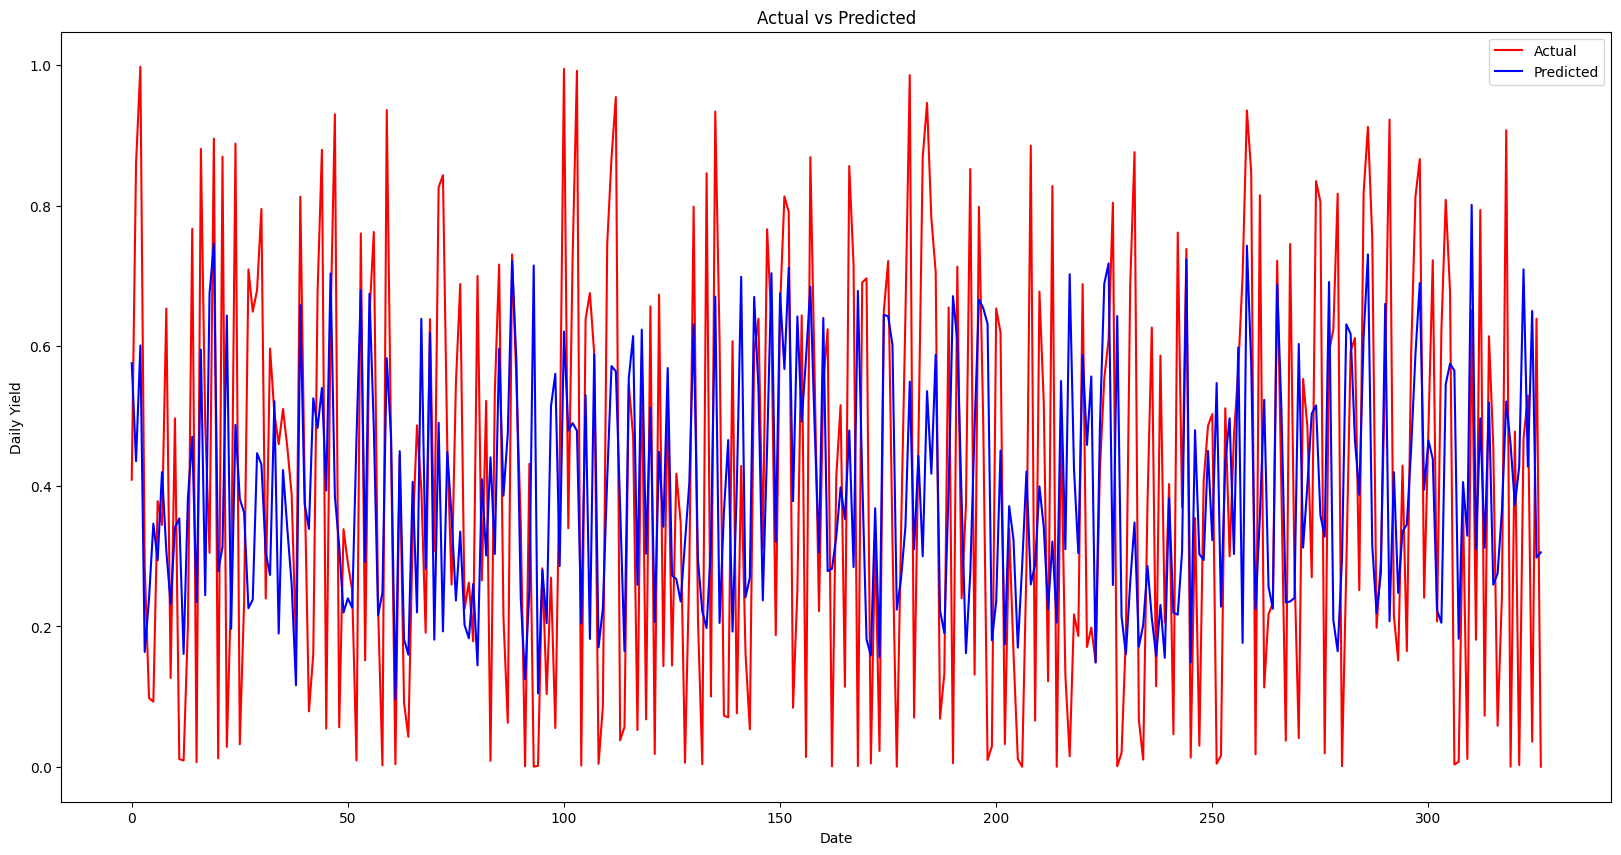

In [83]:
#using SVM
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

#predicting the test set results
y_pred = regressor.predict(X_test)

#print the predicted values
y_pred

#plotting actual and predicted values in different colors
plt.figure(figsize=(20,10))
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_pred, color='blue', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Daily Yield')
plt.legend()
plt.show()


In [84]:
#print accuracy and mean squared error
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Accuracy:",100-mean_squared_error(y_test, y_pred))

#calculating the root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",rms)


Mean Squared Error: 0.07929156458427397
Accuracy: 99.92070843541573
RMSE: 0.28158757888847646
